# Lecture 2: Data Sources

### Zhentao Shi

kernel: base (python 3.11.3)

* Online archives
* API (Application Programming Interface)
* Proprietary data
* Survey data

## Public data

* Time Series
  - Natural ordering of observations
  - A single realization in history
  - eg. GDP, stock prices

* Microeconomic data
  - No natural ordering
  - Collected at the same time, or time does not matter
  - [Auction data](https://capcp.la.psu.edu/data-and-software/alaska-oil-and-gas-auction-data/)

* Aggregate panel data
  - [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/?lang=en)
  - [Atlas Trade Data](https://atlas.cid.harvard.edu/about-data)
  - [IMF databases](https://data.imf.org/?sk=388DFA60-1D26-4ADE-B505-A05A558D9A42&sId=1479329132316)

## Gated Data

* Applications needed
  * Chinese Longitudinal Healthy Longevity Survey [link](https://www.icpsr.umich.edu/web/NACDA/studies/36692)
  * China Household Finance Survey [link](https://chfs.swufe.edu.cn/)


## CUHK Library

* [LSEG (formerly Refinitiv)](http://easyaccess1.lib.cuhk.edu.hk/limited/refinitiv.html)
* [WRDS](http://easyaccess1.lib.cuhk.edu.hk/limited/wrds.htm)
* [CEIC](https://cas-ceicdata-com.easyaccess1.lib.cuhk.edu.hk/login#)


## Econ Department

* WIND
* CEIC
* Bloomberg
* China Census

## Time Series

- Macroeconomics
  - China's [National Bureau of Statistics](https://data.stats.gov.cn/easyquery.htm?cn=B01)
  - Federal Reserve [FRED database](https://research.stlouisfed.org/econ/mccracken/fred-databases/)
- Financial
  - [Yahoo Finance](https://finance.yahoo.com/)

## HK GDP

* [Census and Statistics Department](https://www.censtatd.gov.hk/en/web_table.html?id=33#)
  * Webpage With API

In [2]:
import requests
import pandas as pd
import json
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np


We load requests, pandas, json, pandas_datareader, matplotlib, and numpy so the notebook can fetch remote data, manipulate tables, and create plots.


## Federal Reserve

* China GDP [[link](https://fred.stlouisfed.org/series/MKTGDPCNA646NWDB)]

* [DataReader](https://pydata.github.io/pandas-datareader/devel/remote_data.html) provides direct online access.

            MKTGDPCNA646NWDB
DATE                        
2022-01-01      1.831677e+13
2023-01-01      1.827036e+13
2024-01-01      1.874380e+13


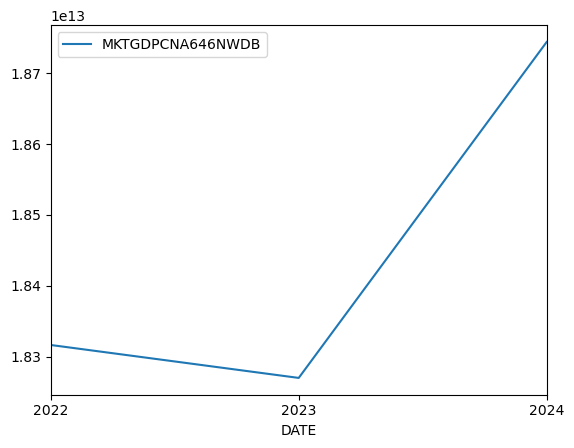

In [3]:
data = pdr.get_data_fred('MKTGDPCNA646NWDB')
print(data)
data.plot()
plt.show()

Using pandas_datareader, we download the World Bank GDP series from FRED, print the raw values, and plot the time series to visualize GDP growth.



Another example: [Quarterly US Industrial Production Index](https://fred.stlouisfed.org/series/IPB50001SQ)


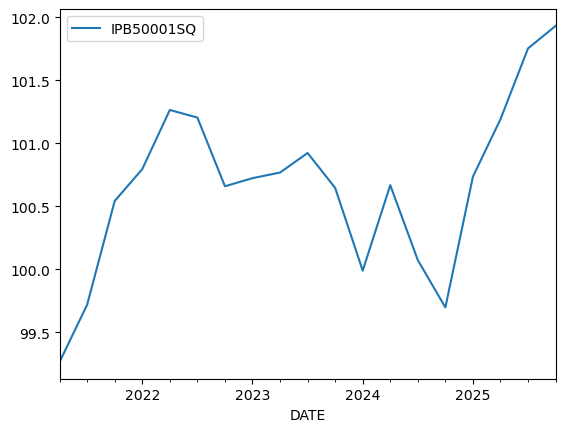

In [4]:
data = pdr.get_data_fred('IPB50001SQ')
data.plot()
plt.show()


Here we pull the US industrial production index from FRED and immediately plot it, giving a quick view of cyclical movements in manufacturing.


## Finance Data


* [Yahoo Finance](https://finance.yahoo.com/)

* Tick `AAPL` for *Apple Inc.* 

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2026-01-14  259.959991  261.820007  256.709991  259.489990  40019400
2026-01-15  258.209991  261.040009  257.049988  260.649994  39388600
2026-01-16  255.529999  258.899994  254.929993  257.899994  72142800
2026-01-20  246.699997  254.789993  243.419998  252.729996  80267500
2026-01-21  247.649994  251.559998  245.179993  248.699997  54446100


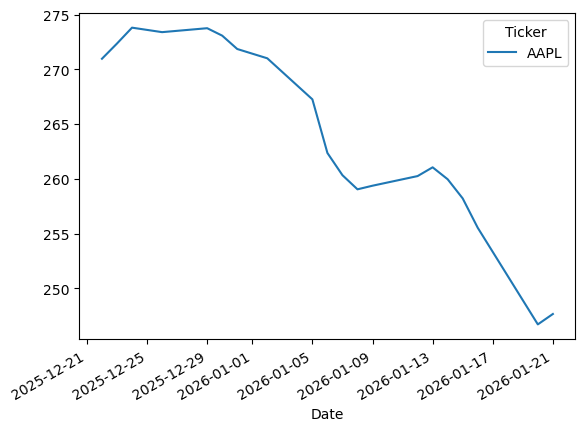

In [5]:
import yfinance as yf

data = yf.download('AAPL')
print(data.tail())
data['Close'].plot()
plt.show()

The yfinance download brings in historical Apple prices, shows the most recent observations, and plots the closing price to illustrate the equity trend.


### Shanghai Composite Index

[*********************100%***********************]  1 of 1 completed

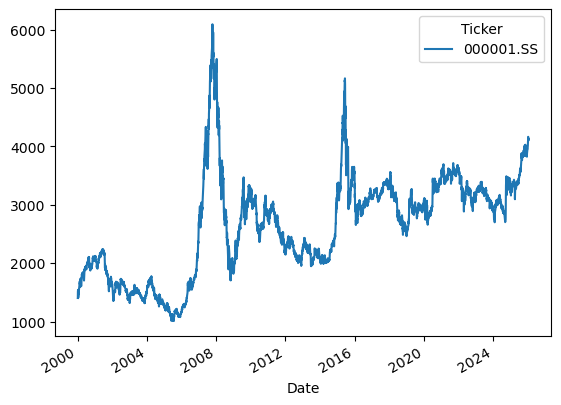

In [6]:
data = yf.download("000001.SS", start='2000-01-01')
data['Close'].plot()
plt.show()

In [7]:
data

Price,Close,High,Low,Open,Volume
Ticker,000001.SS,000001.SS,000001.SS,000001.SS,000001.SS
Date,,,,,
2000-01-04,1406.370972,1407.517944,1361.213989,1368.692993,0
2000-01-05,1409.682007,1433.780029,1398.322998,1407.828979,0
2000-01-06,1463.942017,1463.954956,1400.253052,1406.036011,0
2000-01-07,1516.604004,1522.824951,1477.154053,1477.154053,0
2000-01-10,1545.112061,1546.723022,1506.404053,1531.712036,0
...,...,...,...,...,...
2026-01-16,4101.913086,4140.225098,4091.811035,4127.062988,763600
2026-01-19,4114.000000,4126.518066,4090.056885,4090.718994,688900


We repeat the yfinance request for the Shanghai Composite Index and plot the closing levels to compare mainland equity dynamics.


### 000001.SS Return

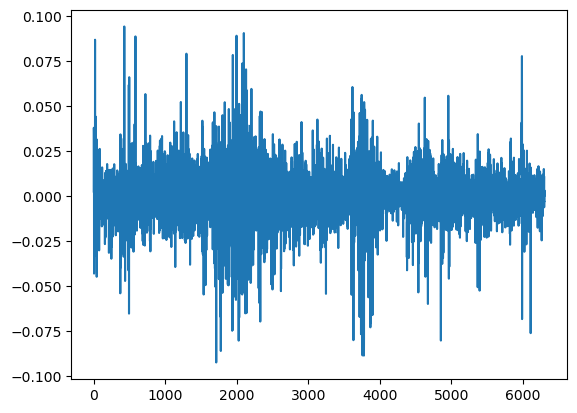

In [8]:
import numpy as np

SH = data['Close']
SH_diff = np.diff(np.log(SH), axis=0)

plt.plot(SH_diff)
plt.show()

By taking log differences of the Shanghai Composite closes, we approximate daily returns and plot them to highlight volatility rather than price levels.


### Cryptocurrencies

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


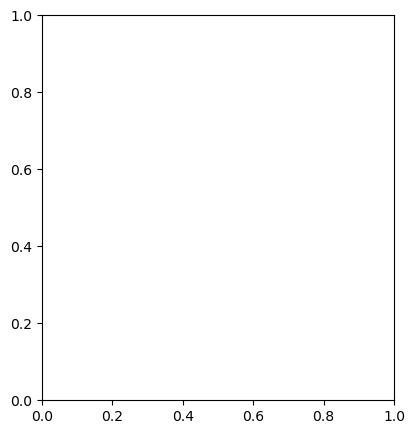

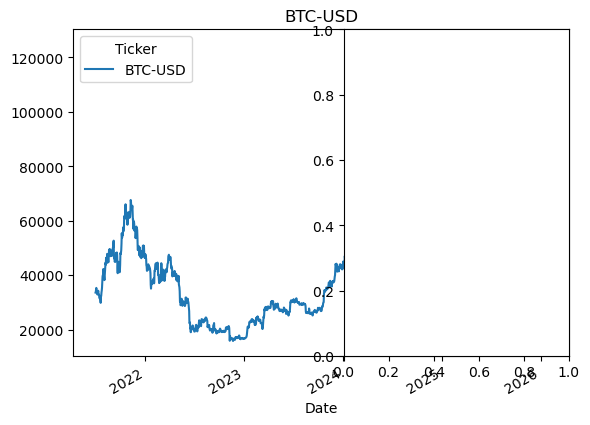

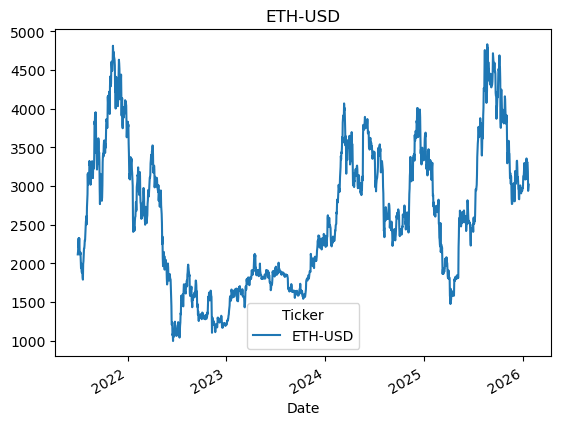

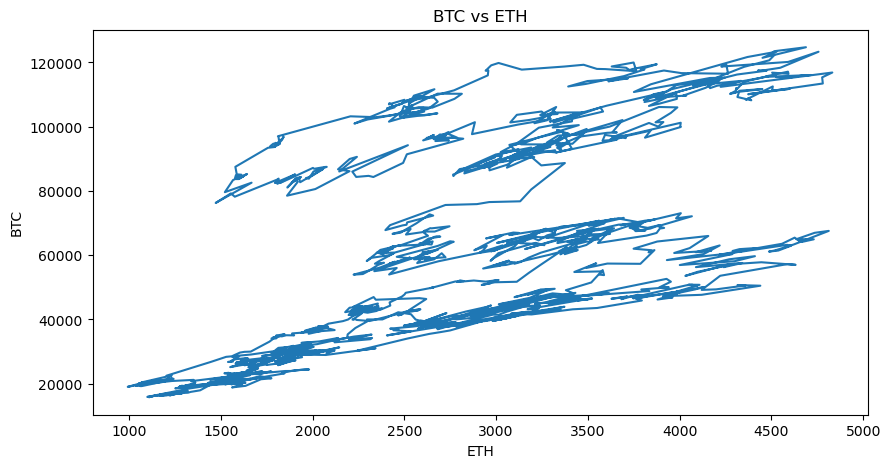

In [9]:
BTC = yf.download('BTC-USD', start='2021-07-01')['Close']
ETH = yf.download('ETH-USD', start='2021-07-01')['Close']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
BTC.plot()
plt.title('BTC-USD')

plt.subplot(1, 2, 2)
ETH.plot()
plt.title('ETH-USD')

plt.figure(figsize=(10, 5))
plt.plot(ETH.values, BTC.values)
plt.xlabel('ETH')
plt.ylabel('BTC')
plt.title('BTC vs ETH')
plt.show()

This section downloads BTC and ETH prices, plots each series in separate panels, and adds a scatter plot to compare the two assets co-movement.


## Repeated Data Download

* Example: HKMA [API](https://apidocs.hkma.gov.hk/documentation/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity/)
  * Save as a csv file
  * Repeat the regular job via `cron` in Linux

In [10]:
url = "https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity"
response = requests.get(url)
data = response.json()

hkma = pd.DataFrame(data['result'])
hkma.to_csv('hkma.csv', index=False)

The code queries the HKMA market data API, converts the JSON result into a DataFrame, and saves the snapshot to 'hkma.csv' for offline use.


## Access Database

* API for CEIC

### Bank Marketing Data


* Direct marketing campaigns of a Portuguese banking institution. 


* S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, GuimarÃ£es, Portugal, October, 2011. EUROSIS.

In [11]:
import pandas as pd

# Read the CSV file
d0 = pd.read_csv('data_example/bank-full.csv', delimiter=';', 
                 dtype={'age': int, 'job': str, 'balance': int})

# Display the first few rows
print(d0.head())

# Display the column names
print(d0.columns)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 

We load the bank marketing CSV, specifying column types, then peek at the first rows and column names to understand the available fields.


## Data Transformation

* pick out a subset of rows that satisfies some conditions
* pick out a subset of columns
* order rows. Default ordering is from low to high
* add columns produced by the existing ones

In [12]:
# Select columns
d1 = d0.loc[:, 'age':'housing']
d1.head()

,age,job,marital,education,default,balance,housing
0,58,management,married,tertiary,no,2143,yes
1,44,technician,single,secondary,no,29,yes
2,33,entrepreneur,married,secondary,no,2,yes
3,47,blue-collar,married,unknown,no,1506,yes
4,33,unknown,single,unknown,no,1,no


Selecting the columns from 'age' through 'housing' creates a narrower view of the data, and the final line previews the resulting subset.


In [13]:
d1.head(5)

,age,job,marital,education,default,balance,housing
0,58,management,married,tertiary,no,2143,yes
1,44,technician,single,secondary,no,29,yes
2,33,entrepreneur,married,secondary,no,2,yes
3,47,blue-collar,married,unknown,no,1506,yes
4,33,unknown,single,unknown,no,1,no


Calling head(5) again reiterates the first five rows after the column selection to confirm the transformation.


In [14]:
d1.iloc[9:20]

,age,job,marital,education,default,balance,housing
9,43,technician,single,secondary,no,593,yes
10,41,admin.,divorced,secondary,no,270,yes
11,29,admin.,single,secondary,no,390,yes
12,53,technician,married,secondary,no,6,yes
13,58,technician,married,unknown,no,71,yes
14,57,services,married,secondary,no,162,yes
15,51,retired,married,primary,no,229,yes
16,45,admin.,single,unknown,no,13,yes
17,57,blue-collar,married,primary,no,52,yes
18,60,retired,married,primary,no,60,yes


Using iloc[9:20] pulls a slice of observations 9 through 19 so we can inspect a specific window of records.


In [15]:
# Select a subset by conditions
d1[(d1['job'] == 'blue-collar') & (d1['age'] > 50)]


,age,job,marital,education,default,balance,housing
17,57,blue-collar,married,primary,no,52,yes
33,59,blue-collar,married,secondary,no,0,yes
42,60,blue-collar,married,unknown,no,104,yes
50,54,blue-collar,married,secondary,no,1291,yes
62,57,blue-collar,married,primary,no,249,yes
...,...,...,...,...,...,...,...
44922,54,blue-collar,single,secondary,no,1633,yes
45127,67,blue-collar,married,secondary,no,16353,no
45135,53,blue-collar,married,primary,no,1294,no
45174,62,blue-collar,married,secondary,no,272,no


The boolean filter keeps only blue collar clients older than 50, showing how to apply multiple conditions on a single column.


In [16]:
d1[(d1['job'] == 'blue-collar') & (d1['age'] > 20) & (d1['age'] <= 30)]

,age,job,marital,education,default,balance,housing
20,28,blue-collar,married,secondary,no,723,yes
36,25,blue-collar,married,secondary,no,-7,yes
135,23,blue-collar,married,secondary,no,94,yes
221,28,blue-collar,married,primary,no,324,yes
246,22,blue-collar,single,secondary,no,0,yes
...,...,...,...,...,...,...,...
44991,25,blue-collar,single,secondary,no,1857,yes
45005,26,blue-collar,single,secondary,no,2007,no
45032,29,blue-collar,single,secondary,no,2806,no
45084,29,blue-collar,single,tertiary,no,455,no


A similar filter isolates blue collar clients between ages 21 and 30 inclusive, illustrating compound range criteria.


In [17]:
# (re)arrange rows
d1.sort_values(['age', 'education'])

,age,job,marital,education,default,balance,housing
40736,18,student,single,primary,no,1944,no
40887,18,student,single,primary,no,608,no
42274,18,student,single,primary,no,608,no
41252,18,student,single,secondary,no,5,no
42146,18,student,single,secondary,no,156,no
...,...,...,...,...,...,...,...
44262,93,retired,married,unknown,no,775,no
44420,93,retired,married,unknown,no,775,no
31233,94,retired,divorced,secondary,no,1234,no
33699,95,retired,divorced,primary,no,2282,no


Sorting by age and education orders the DataFrame to make patterns across demographics easier to read.


In [18]:
d1.sort_values(['age', 'education'], ascending=[False, True])

,age,job,marital,education,default,balance,housing
33699,95,retired,divorced,primary,no,2282,no
41663,95,retired,married,secondary,no,0,no
31233,94,retired,divorced,secondary,no,1234,no
44262,93,retired,married,unknown,no,775,no
44420,93,retired,married,unknown,no,775,no
...,...,...,...,...,...,...,...
41273,18,student,single,unknown,no,3,no
41487,18,student,single,unknown,no,108,no
42954,18,student,single,unknown,no,108,no
43637,18,student,single,unknown,no,348,no


Here we sort by age descending and education ascending, demonstrating how to control sort direction per column.


In [19]:
# Add generated columns (last column)
d1['edu_f'] = d1['education'].astype('category').cat.codes
d1.head()

,age,job,marital,education,default,balance,housing,edu_f
0,58,management,married,tertiary,no,2143,yes,2
1,44,technician,single,secondary,no,29,yes,1
2,33,entrepreneur,married,secondary,no,2,yes,1
3,47,blue-collar,married,unknown,no,1506,yes,3
4,33,unknown,single,unknown,no,1,no,3


Converting 'education' to categorical codes creates a numeric feature edu_f that can be fed into models while preserving category structure.


In [20]:
# Create new dataframe with specified columns
d1_transmuted = d1[['age', 'marital', 'education']].copy()

d1_transmuted['marital'] = d1_transmuted['marital'].astype('category').cat.codes
d1_transmuted['education'] = d1_transmuted['education'].astype('category').cat.codes
d1_transmuted.head()

,age,marital,education
0,58,1,2
1,44,2,1
2,33,1,1
3,47,1,3
4,33,2,3


We build a new DataFrame of select columns and encode the categorical fields as integers.


In [21]:
# Convert the integer columns to strings so that they become dummy variables
d1_dummy = d1_transmuted.copy()
d1_dummy['marital'] = d1_dummy['marital'].astype(str)
d1_dummy['education'] = d1_dummy['education'].astype(str)

# Create dummy variables for all columns
dummies = pd.get_dummies(d1_dummy, columns=['marital', 'education'])
dummies.head()

,age,marital_0,marital_1,marital_2,education_0,education_1,education_2,education_3
0,58,False,True,False,False,False,True,False
1,44,False,False,True,False,True,False,False
2,33,False,True,False,False,True,False,False
3,47,False,True,False,False,False,False,True
4,33,False,False,True,False,False,False,True


Casting the encoded columns to strings and applying get_dummies produces one hot encoded dummy variables for downstream modeling.


## Summarize

* `group_by`

In [22]:
# Overall mean balance
mean_b = d1['balance'].mean()
print(f'Mean Balance: {mean_b}')

Mean Balance: 1362.2720576850766


Computing the mean balance gives a single summary metric that describes the typical account size across all clients.


In [23]:
# Mean balance by groups
mean_balance_by_education = d1.groupby('education')['balance'].mean()
print(mean_balance_by_education)

education
primary      1250.949934
secondary    1154.880786
tertiary     1758.416435
unknown      1526.754443
Name: balance, dtype: float64


Grouping by education and taking the mean shows how average balances differ by schooling level.


In [24]:
# Mean, standard deviation and count by groups
grouped = d1.groupby(['education', 'marital'])
summary = grouped['balance'].agg(['mean', 'std', 'count'])
summary.columns = ['mean_b', 'sd_b', 'count_n']
print(summary)

                         mean_b         sd_b  count_n
education marital                                    
primary   divorced  1137.680851  2429.939497      752
          married   1286.655547  2760.065804     5246
          single    1131.215709  2464.671938      853
secondary divorced   902.772647  2082.642267     2815
          married   1251.750254  2756.505779    13770
          single    1060.546773  2288.491922     6617
tertiary  divorced  1700.917063  4252.286797     1471
          married   1848.779341  3937.521135     7038
          single    1643.351210  3545.187122     4792
unknown   divorced  1417.147929  2096.269137      169
          married   1557.787931  3348.602718     1160
          single    1493.657197  2987.710066      528


Aggregating by education and marital status with mean, standard deviation, and count provides a richer summary of balance distributions across demographic segments.
